<a href="https://colab.research.google.com/github/patilgauri005/Lab-works-/blob/main/Unsupervised_Learning_K_means_%2C_PCA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Unsupervised Learning
## k Means clustring

Gauri Nitin Patil - 20230802104

Silhouette Score for KMeans (k=3): 0.285

Explained Variance Ratio by PCA Components:
[0.36198848 0.1920749 ]


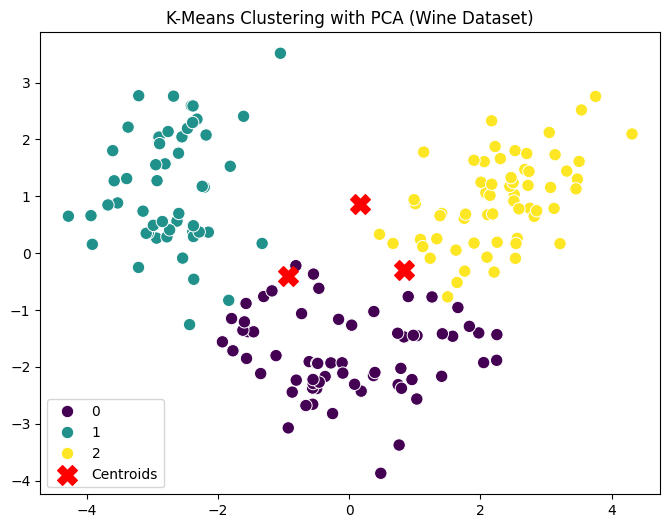

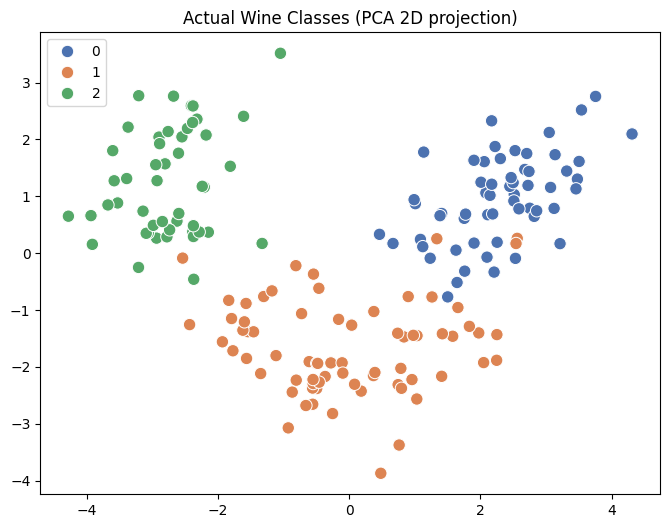

In [ ]:
# ==============================
# AIML LAB 2 - Unsupervised Learning
# Topic: K-Means Clustering & PCA (Wine Dataset)
# ==============================

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset (Wine)
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Drop the last column (as per lab instruction)
X = df.drop('target', axis=1)

# Optional: Standardize the data before clustering and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 4: Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for KMeans (k=3): {silhouette_avg:.3f}")

# Step 5: Apply PCA for Dimensionality Reduction (2 Components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio by PCA Components:")
print(pca.explained_variance_ratio_)

# Step 6: Plot KMeans Clusters after PCA Transformation
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_kmeans, palette="viridis", s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering with PCA (Wine Dataset)")
plt.legend()
plt.show()

# Step 7: Plot Actual Labels for Comparison
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="deep", s=80)
plt.title("Actual Wine Classes (PCA 2D projection)")
plt.show()




### Principal Component Analysis (PCA)
reduce dimensionality
PC1 = more variance (more data)
PC3 = 2nd highest varience
PCA LIBRARY IMPORT
explain varience ratio

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original training data shape: (60000, 784)

Explained Variance Ratio (first 10 PCs):
[0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427
 0.01923344 0.01745799 0.01535092 0.0140172 ]


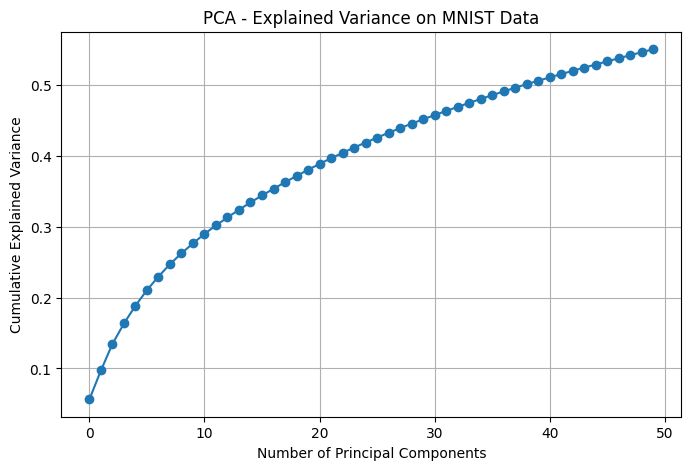

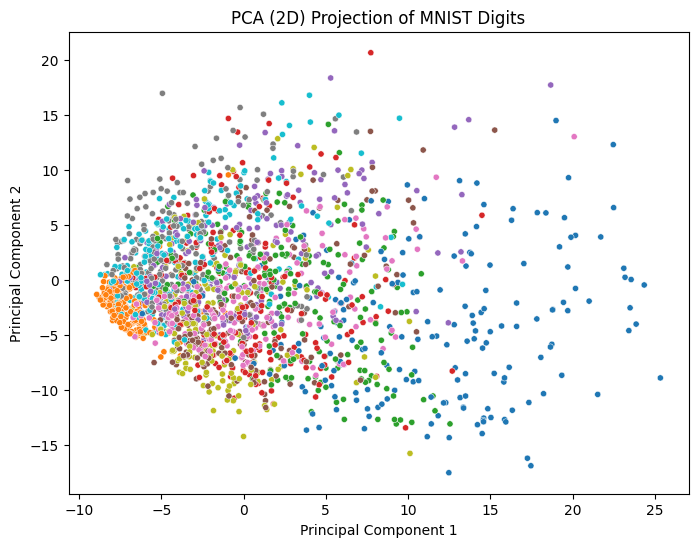

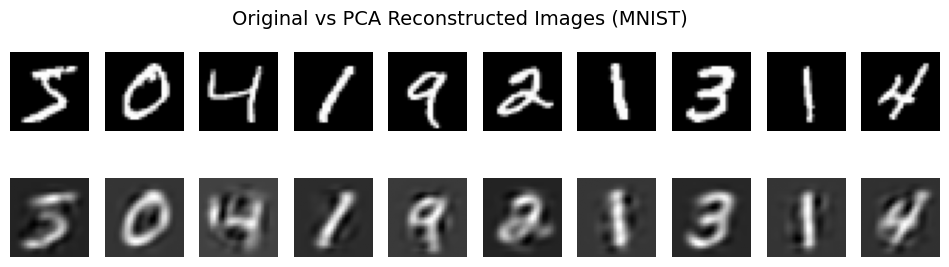

In [ ]:
# =====================================
# AIML LAB 2 (Part 2): PCA on Image Data
# Dataset: MNIST Handwritten Digits
# =====================================

# Step 1: Import necessary libraries
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 3: Flatten image data (28x28 → 784)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("Original training data shape:", x_train_flat.shape)

# Step 4: Standardize data (important before PCA)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Step 5: Apply PCA (reduce to 50 components)
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Step 6: Explained Variance Ratio
explained_var = pca.explained_variance_ratio_
print("\nExplained Variance Ratio (first 10 PCs):")
print(explained_var[:10])

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance on MNIST Data')
plt.grid()
plt.show()

# Step 7: Visualize first two PCA components (2D projection)
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_train_pca[:2000,0], y=x_train_pca[:2000,1], hue=y_train[:2000],
                palette='tab10', legend=False, s=20)
plt.title("PCA (2D) Projection of MNIST Digits")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Step 8: Display a few original vs reconstructed images (using PCA inverse transform)
x_reconstructed = pca.inverse_transform(x_train_pca[:10])
x_reconstructed = scaler.inverse_transform(x_reconstructed)
x_reconstructed = x_reconstructed.reshape(-1, 28, 28)

plt.figure(figsize=(12,3))
for i in range(10):
    # Original image
    plt.subplot(2,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel("Original", fontsize=12)

    # Reconstructed image
    plt.subplot(2,10,i+11)
    plt.imshow(x_reconstructed[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel("PCA (Reconstructed)", fontsize=12)

plt.suptitle("Original vs PCA Reconstructed Images (MNIST)", fontsize=14)
plt.show()
